In [57]:
import logging
import os
import tempfile
import numpy as np
import pandas as pd
import csv
import string
import json
import tensorflow as tf
import pickle
import copy

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import operator
import math

In [2]:
#Convert coordinates cartesian to polar coordinates
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2) #radious
    phi = np.arctan2(y, x)     #angle
    return [rho, phi]

In [19]:
fpath= os.getcwd()
fprepath= os.path.join(fpath,"Preprocessing/")
file = open(os.path.join(fprepath,"jobSkillD2V_sep.p"),"rb")
JobSentenceEmb = pickle.load(file)

In [22]:
pmSentences= []
for jse in JobSentenceEmb:
    if jse[0].find("project manager or equivalent")!= -1 and jse[0].find("senior project manager or equivalent")== -1:
        pmSentences.append(jse[0:4])

jsenemb=[]
jsenskill=[]
for js in pmSentences:
    for tkn in js[3]:
        jsenemb.append(tkn)  
    for tk in js[2]:
        jsenskill.append(tk)

print ('Total Sentences: {}'.format(len(jsenemb)))
jsenemb = np.asarray(jsenemb)

Total Sentences: 2076


In [52]:
goldStandardEmb = []
goldStandardLbl = []
print(jsenskill[57])
goldStandardEmb.append(jsenemb[57])
goldStandardLbl.append(jsenskill[57])
print(jsenskill[98])
goldStandardEmb.append(jsenemb[98])
goldStandardLbl.append(jsenskill[98])
print(jsenskill[122])
goldStandardEmb.append(jsenemb[122])
goldStandardLbl.append(jsenskill[122])
print(jsenskill[137])
goldStandardEmb.append(jsenemb[137])
goldStandardLbl.append(jsenskill[137])
print(jsenskill[140])
goldStandardEmb.append(jsenemb[140])
goldStandardLbl.append(jsenskill[140])
print(jsenskill[160])
goldStandardEmb.append(jsenemb[160])
goldStandardLbl.append(jsenskill[160])
print(jsenskill[186])
goldStandardEmb.append(jsenemb[186])
goldStandardLbl.append(jsenskill[186])
print(jsenskill[194])
goldStandardEmb.append(jsenemb[194])
goldStandardLbl.append(jsenskill[194])
print(jsenskill[285])
goldStandardEmb.append(jsenemb[285])
goldStandardLbl.append(jsenskill[285])
print(jsenskill[410])
goldStandardEmb.append(jsenemb[410])
goldStandardLbl.append(jsenskill[410])
print(jsenskill[586])
goldStandardEmb.append(jsenemb[586])
goldStandardLbl.append(jsenskill[586])
print(jsenskill[876])
goldStandardEmb.append(jsenemb[876])
goldStandardLbl.append(jsenskill[876])
print(jsenskill[923])
goldStandardEmb.append(jsenemb[923])
goldStandardLbl.append(jsenskill[923])
print(jsenskill[929])
goldStandardEmb.append(jsenemb[929])
goldStandardLbl.append(jsenskill[929])
print(jsenskill[1042])
goldStandardEmb.append(jsenemb[1042])
goldStandardLbl.append(jsenskill[1042])
print(jsenskill[1046])
goldStandardEmb.append(jsenemb[1046])
goldStandardLbl.append(jsenskill[1046])
print(jsenskill[1123])
goldStandardEmb.append(jsenemb[1123])
goldStandardLbl.append(jsenskill[1123])
# for i,s2v in enumerate(jsenskill):
#     print("{} - {}".format(i,s2v))
# print(pmSentences[58])

['integration']
['project_management']
['contract_management']
['team_building']
['leadership']
['marketing_strategy']
['cross-functional_team_leadership']
['performance_management']
['software_project_management']
['business_requirements']
['product_management']
['certificación_pmp']
['customer_retention']
['customer_satisfaction']
['project_life_cycle']
['business_impact_analysis']
['human_relationship']


In [44]:
def dot_product(v1, v2):
    return sum(map(operator.mul, v1, v2))

def simil_cos(v1, v2):
    prod = dot_product(v1, v2)
    len1 = math.sqrt(dot_product(v1, v1))
    len2 = math.sqrt(dot_product(v2, v2))
    return prod / (len1 * len2)

In [54]:
#Cosine Similarity calculation
cosineMatrix= np.zeros((len(goldStandardEmb),len(goldStandardEmb)))

for x,s1 in enumerate(goldStandardEmb):
    for y,s2 in enumerate(goldStandardEmb):
        sim= round(simil_cos(s1,s2),8)
        cosineMatrix[x][y]=sim

In [55]:
dfCos = pd.DataFrame(cosineMatrix,columns=[s[0] for s in goldStandardLbl])
dfCos

,integration,project_management,contract_management,team_building,leadership,marketing_strategy,cross-functional_team_leadership,performance_management,software_project_management,business_requirements,product_management,certificación_pmp,customer_retention,customer_satisfaction,project_life_cycle,business_impact_analysis,human_relationship
0,1.000000,0.883633,0.670437,0.899713,0.731336,0.728719,0.811283,0.591900,0.745839,0.893953,0.779179,0.646556,0.600072,0.758597,0.714917,0.686797,0.709982
1,0.883633,1.000000,0.591269,0.784078,0.859172,0.647908,0.705698,0.728531,0.918933,0.783021,0.655875,0.678109,0.512107,0.716043,0.630417,0.583641,0.567243
2,0.670437,0.591269,1.000000,0.696370,0.763687,0.601186,0.630235,0.579683,0.584801,0.625958,0.715487,0.742934,0.754951,0.954928,0.788552,0.812434,0.782454
3,0.899713,0.784078,0.696370,1.000000,0.651775,0.717607,0.655214,0.574745,0.624297,0.786802,0.730419,0.814731,0.772115,0.810360,0.862778,0.858916,0.870774
4,0.731336,0.859172,0.763687,0.651775,1.000000,0.698560,0.650406,0.720268,0.867882,0.574516,0.646120,0.748586,0.610180,0.831931,0.664927,0.637881,0.595331
5,0.728719,0.647908,0.601186,0.717607,0.698560,1.000000,0.658933,0.564710,0.629116,0.603068,0.802078,0.624697,0.576691,0.671619,0.552518,0.552162,0.601338
6,0.811283,0.705698,0.630235,0.655214,0.650406,0.658933,1.000000,0.604308,0.627570,0.776218,0.599166,0.463767,0.555430,0.606540,0.544574,0.543141,0.559211
7,0.591900,0.728531,0.579683,0.574745,0.720268,0.564710,0.604308,1.000000,0.737142,0.551657,0.629786,0.551730,0.377421,0.581220,0.423383,0.436541,0.404845
8,0.745839,0.918933,0.584801,0.624297,0.867882,0.629116,0.627570,0.737142,1.000000,0.722279,0.700480,0.648289,0.449735,0.642511,0.586577,0.528680,0.523273
9,0.893953,0.783021,0.625958,0.786802,0.574516,0.603068,0.776218,0.551657,0.722279,1.000000,0.823643,0.620530,0.582835,0.641450,0.668937,0.640849,0.668991


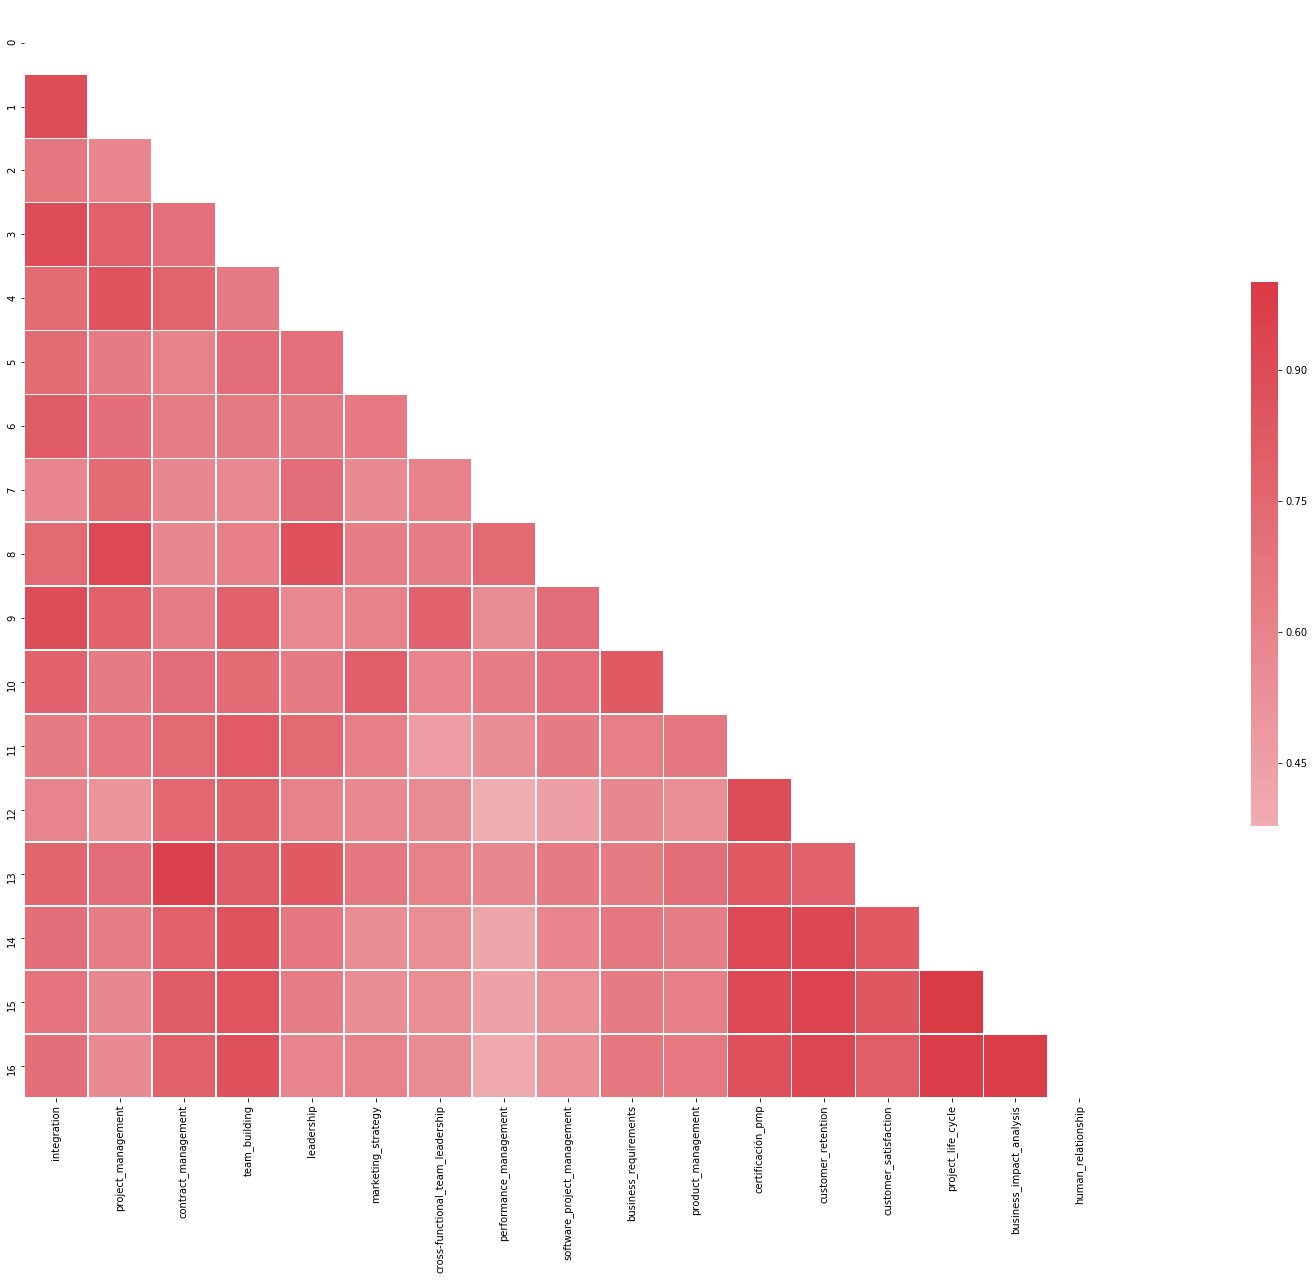

In [58]:
# Generate a mask for the upper triangle
mask = np.zeros_like(dfCos, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfCos, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
fprepath= os.path.join(fpath,"Preprocessing/")
dfCos.to_csv(os.path.join(fprepath,"SimCosMatGoldStandardSkillD2V_sepc.csv"))

In [61]:
#Principal Component Analysis conversion from 200 to 2 dimensions
pca = PCA(n_components=2).fit(goldStandardEmb)
datapoint = pca.transform(goldStandardEmb)

In [62]:
polars=[]
for point in datapoint:
    polar = cart2pol(point[0], point[1])
#     print(polar)
    polars.append(polar)
#     break

C:\Users\Victor\Anaconda3\envs\tensorflowCPU\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


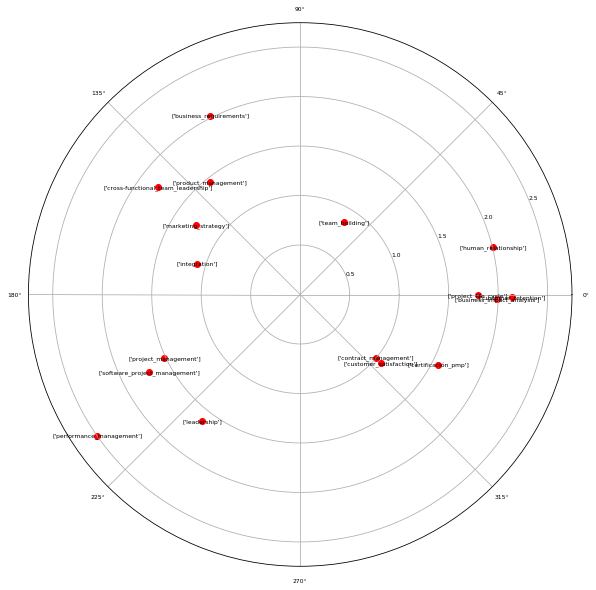

In [101]:
r=[]
theta=[]
for cp in polars:
    r.append(cp[0])
    theta.append(cp[1])
    
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(111,projection='polar')
#ax.set_thetamin(110)
#ax.set_thetamax(270)
ax.set_rmax(0.012)
c = ax.scatter(theta, r,c='r')
plt.rcParams.update({'font.size': 6})
for i, p in enumerate(goldStandardLbl):
    ax.annotate(p,xy=(theta[i],r[i]),horizontalalignment='center',
            verticalalignment='center')
fig.show()
plt.savefig(os.path.join(fprepath,"polar_set_goldstandardSkillD2V_sep") + '.png', dpi = 300)